In [193]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [194]:
 
data = pd.read_csv('customer_churn.csv')
#dataset structure
data.head()


,CustomerID,Age,Subscription_Length_Months,Watch_Time_Hours,Number_of_Logins,Payment_Issues,Number_of_Complaints,Resolution_Time_Days,Membership_Type,Payment_Method,Preferred_Content_Type,Churn
0,1,56,35,157.957600,59,0,1,4,Standard,Debit,Movies,0
1,2,69,15,93.515499,26,0,3,1,Basic,Debit,TV Shows,0
2,3,46,25,87.095143,57,1,6,15,Premium,PayPal,Movies,1
3,4,32,28,113.986323,12,0,4,13,Standard,Credit Card,Sports,0
4,5,60,10,101.534816,11,1,5,8,Basic,Credit Card,Movies,1


In [195]:
#summary statistics for numerical  and categorical features

data.describe(include='all')

,CustomerID,Age,Subscription_Length_Months,Watch_Time_Hours,Number_of_Logins,Payment_Issues,Number_of_Complaints,Resolution_Time_Days,Membership_Type,Payment_Method,Preferred_Content_Type,Churn
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Debit,Movies,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353,347,371,NaN
mean,500.500000,43.81900,18.218000,120.750899,30.984000,0.245000,4.552000,14.978000,NaN,NaN,NaN,0.793000
std,288.819436,14.99103,10.177822,38.583580,17.562237,0.430302,2.912349,8.394521,NaN,NaN,NaN,0.405358
min,1.000000,18.00000,1.000000,10.000000,1.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000
25%,250.750000,31.00000,9.000000,93.630672,16.750000,0.000000,2.000000,7.000000,NaN,NaN,NaN,1.000000
50%,500.500000,44.00000,18.000000,122.085008,31.000000,0.000000,5.000000,15.000000,NaN,NaN,NaN,1.000000
75%,750.250000,56.00000,27.000000,147.273070,47.000000,0.000000,7.000000,22.000000,NaN,NaN,NaN,1.000000


In [196]:
#checking for missing values
data.isnull().sum()

CustomerID                    0
Age                           0
Subscription_Length_Months    0
Watch_Time_Hours              0
Number_of_Logins              0
Payment_Issues                0
Number_of_Complaints          0
Resolution_Time_Days          0
Membership_Type               0
Payment_Method                0
Preferred_Content_Type        0
Churn                         0
dtype: int64

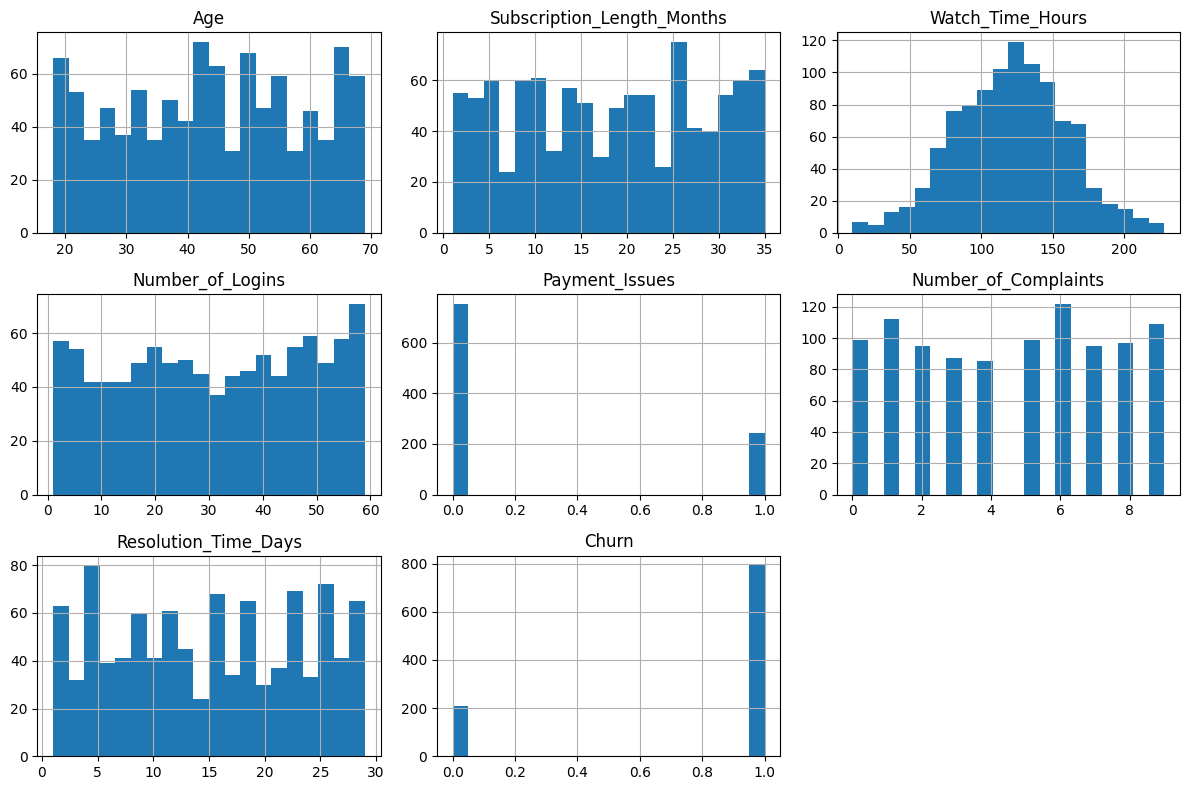

In [197]:
# exploratory data analysis
# drop the CustomerID column as it is not useful for analysis
data.drop(columns=['CustomerID'], inplace=True)
data.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()
#  the churn distribution is imbalanced, with a majority of customers churning(1).
# Most other numerical features appear uniformly distributed except watch_time_hours which is right-skewed. 

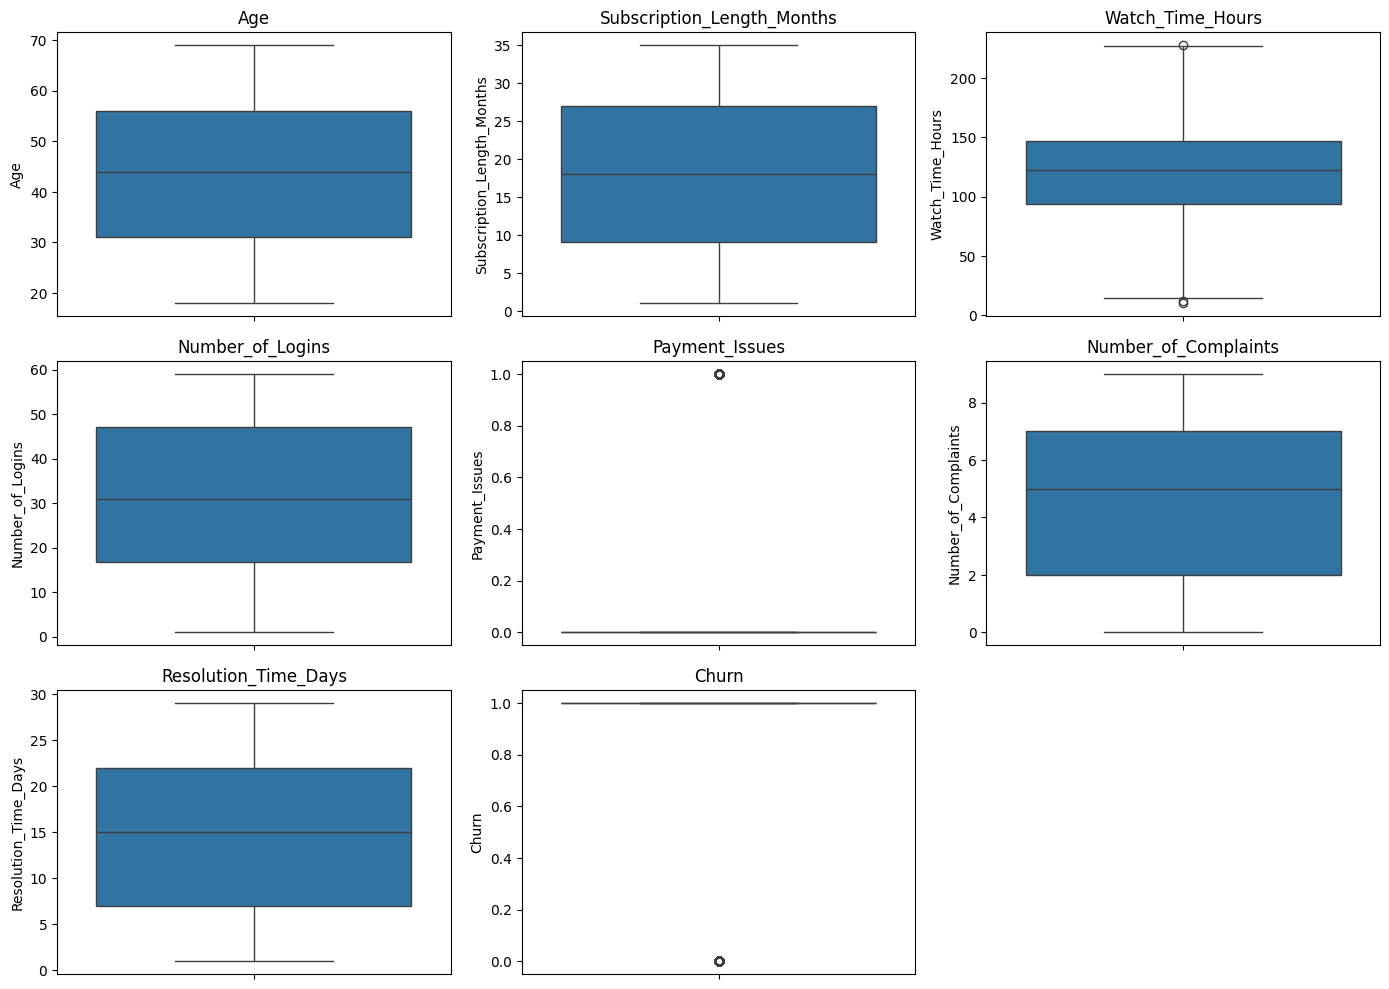

In [198]:
numerical_cols = data.select_dtypes(include='number').columns
# boxplots for numerical features to check for outliers
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()
# The boxplots reveal that watch_time_hours has some outliers. Other numerical features show fewer or no outliers.
# payment issues is skewed to 0, indicating most customers do not have payment issues.  

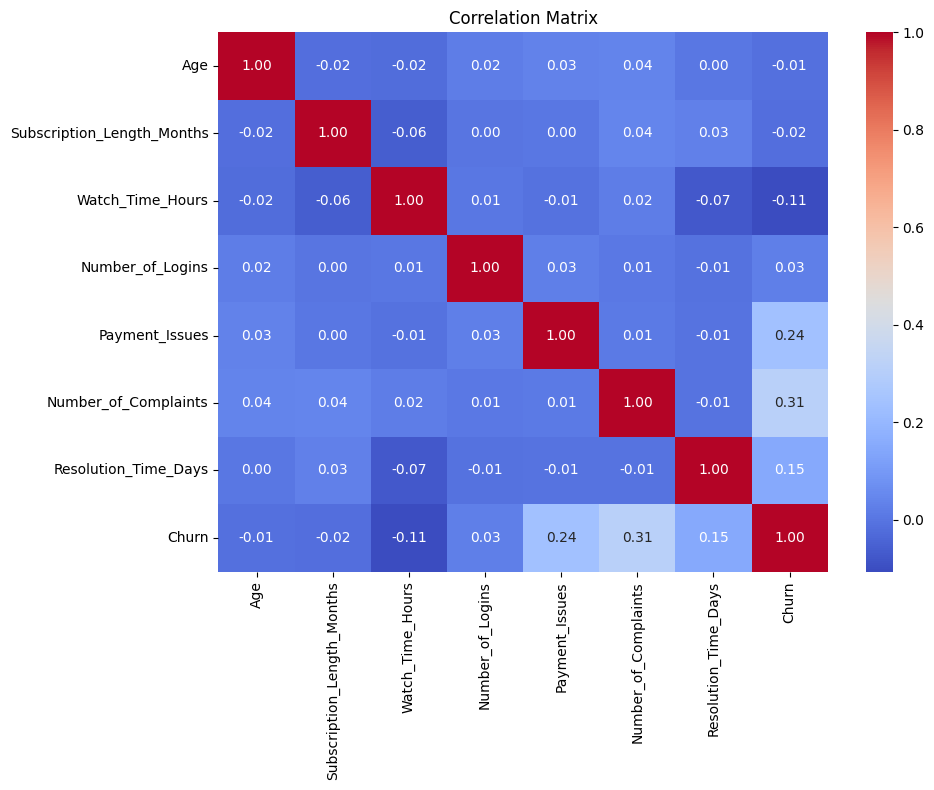

In [199]:
# correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
# the matrix shows that Number_of_Complaints (0.31), Payment_Issues (0.24), and Resolution_Time_Days (0.15) — are the strongest predictors of churn.
# Watch_Time_Hours shows a slight negative correlation (-0.11), suggesting engaged users are less likely to leave. 

In [200]:
#convert numerical features to categorical
le = LabelEncoder()
data['Membership_Type'] = le.fit_transform(data['Membership_Type'])
data['Payment_Method'] = le.fit_transform(data['Payment_Method'])
data['Preferred_Content_Type'] = le.fit_transform(data['Preferred_Content_Type'])


In [201]:
#split the data into features and target
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

In [202]:
decisionTree = DecisionTreeClassifier(random_state=67)
decisionTree.fit(X_train, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",67
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [203]:
# using RandomizedSearchCV instead of GridSearchCV because it is more efficient for hyperparameter tuning. when the search space is large it works better with a range of values.
param_grid = {
    'max_depth': list(range(2, 21)) + [None],
    'min_samples_split': list(range(2, 21)),
    'min_samples_leaf': list(range(1, 21)),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}
random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=67),
    param_grid,
    n_iter=500,
    cv=5,
    scoring='accuracy',
    random_state=67
)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

best_decisiontree = random_search.best_estimator_

Best Parameters: {'min_samples_split': 13, 'min_samples_leaf': 8, 'max_features': None, 'max_depth': 4, 'criterion': 'gini'}
Best Score: 0.8425


In [204]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'max_depth': list(range(2, 21)) + [None],
#     'min_samples_split': list(range(2, 21)),
#     'min_samples_leaf': list(range(1, 21)),
#     'max_features': ['sqrt', 'log2', None],
#     'criterion': ['gini', 'entropy']
# }

# grid_search = GridSearchCV(
#     DecisionTreeClassifier(random_state=67),
#     param_grid,
#     cv=5,
#     scoring='accuracy'
# )

# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

# ran both RandomizedSearchCV and GridSearchCV, got the same score for both but randomizedSearchCV took only 7.5 sec while gridsearch took 12 min.

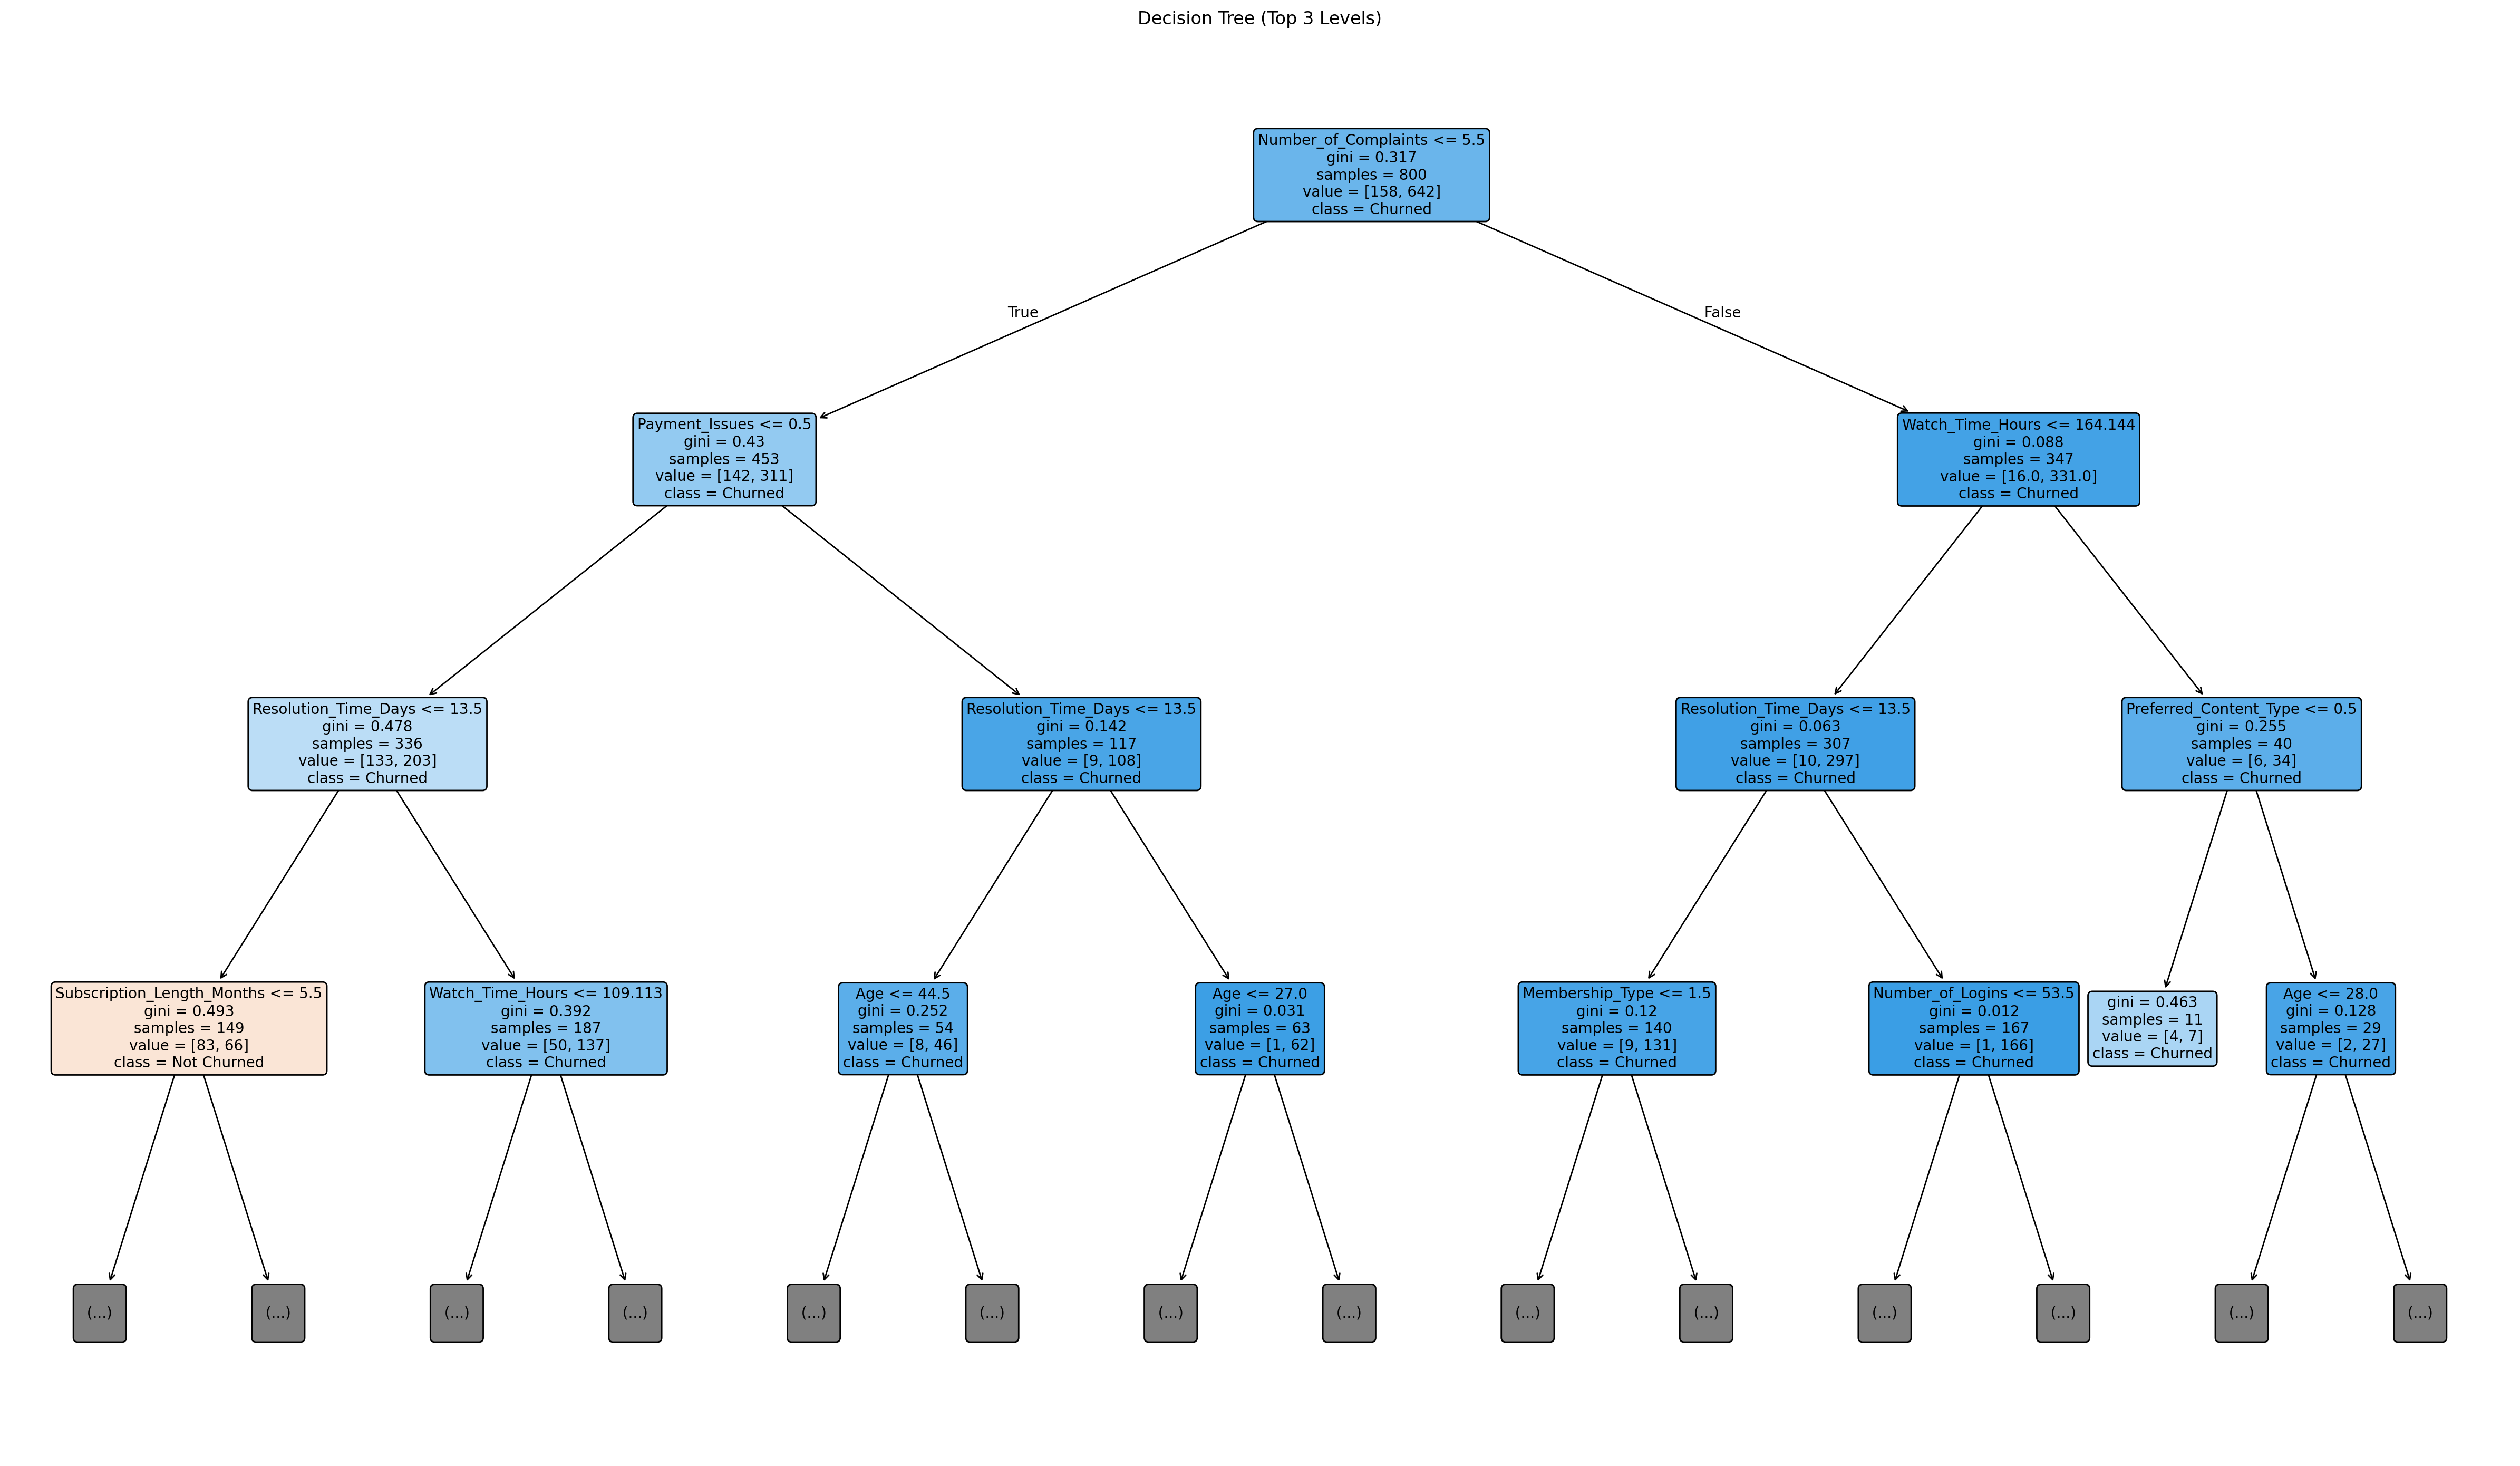

In [205]:
plt.figure(figsize=(24, 14), dpi=200)
plot_tree(
    best_decisiontree,
    feature_names=X.columns,
    class_names=['Not Churned', 'Churned'],
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=10
)
plt.title('Decision Tree (Top 3 Levels)')
plt.tight_layout()
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()
#The Decision Tree's root node splits on Number_of_Complaints, confirming it as the most important predictor of churn. 
# The second level considers Payment_Issues and Watch_Time_Hours, followed by Resolution_Time_Days at the third level.  
# This aligns with the correlation analysis findings that customer service-related features are the strongest churn drivers.


Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.57      0.43      0.49        49
     Churned       0.83      0.89      0.86       151

    accuracy                           0.78       200
   macro avg       0.70      0.66      0.67       200
weighted avg       0.76      0.78      0.77       200



<Figure size 800x600 with 0 Axes>

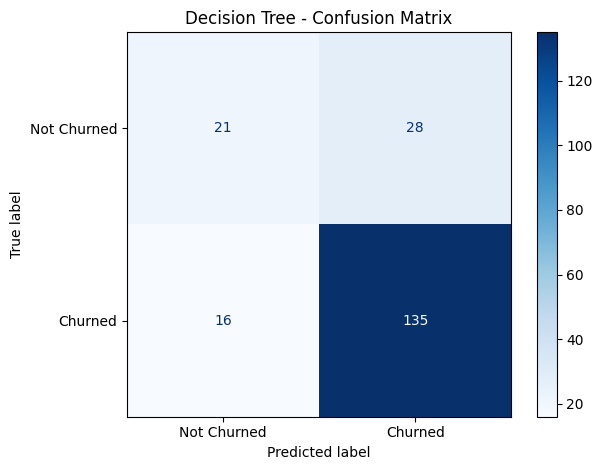

In [206]:
# Make predictions
y_pred = best_decisiontree.predict(X_test)
# class report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned']))
#The cross-validation score was 84.25% while the test accuracy was 78%, meaning the model is overfitting a bit. 
# This is expected with Decision Trees as they tend to overfit training data. 

# Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Not Churned', 'Churned'], cmap='Blues')
plt.title('Decision Tree - Confusion Matrix')
plt.tight_layout()
plt.show()
# The model achieves 78% accuracy with strong performance on the Churned class (recall=0.89, precision=0.83) but weaker performance on Not Churned (recall=0.43, precision=0.57).
# This imbalance in performance reflects the class imbalance in the dataset by having more data on churned customers than non-churned.

In [209]:
# tune it with RandomizedSearchCV like we did before
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': list(range(2, 21)) + [None],
    'min_samples_split': list(range(2, 21)),
    'min_samples_leaf': list(range(1, 21)),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=67),
    param_grid_rf,
    n_iter=150,
    cv=5,
    scoring='accuracy',
    random_state= 67
)

random_search_rf.fit(X_train, y_train)

print("Best Parameters:", random_search_rf.best_params_)
print("Best Score:", random_search_rf.best_score_)

best_rf = random_search_rf.best_estimator_

Best Parameters: {'n_estimators': 50, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 17, 'criterion': 'entropy'}
Best Score: 0.85


=== Decision Tree ===
Accuracy: 0.78

=== Random Forest ===
Accuracy: 0.805

Random Forest Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.73      0.33      0.45        49
     Churned       0.81      0.96      0.88       151

    accuracy                           0.81       200
   macro avg       0.77      0.64      0.67       200
weighted avg       0.79      0.81      0.78       200



<Figure size 800x600 with 0 Axes>

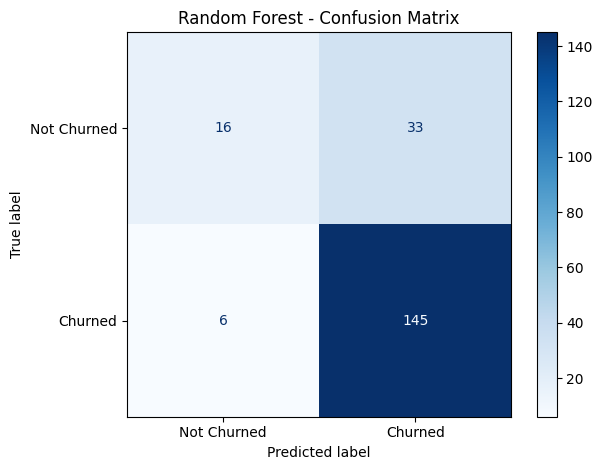

In [ ]:
y_pred_rf = best_rf.predict(X_test)

# Accuracy
print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Classification Report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Not Churned', 'Churned']))

# Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['Not Churned', 'Churned'], cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.tight_layout()
plt.show()
# Random Forest outperformed the Decision Tree with 80.5% test accuracy vs 78%, and a smaller overfitting gap (4.5% vs 6.25%). 
#  Random Forest also  achieved 96% recall on churned customers, meaning it catches nearly all at-risk customers.
# random forest reduces overfitting compared to decision tree.

                      Feature  Importance
5        Number_of_Complaints    0.251939
2            Watch_Time_Hours    0.139775
6        Resolution_Time_Days    0.129994
4              Payment_Issues    0.109812
1  Subscription_Length_Months    0.103576
3            Number_of_Logins    0.077709
0                         Age    0.073476
7             Membership_Type    0.070300
9      Preferred_Content_Type    0.024478
8              Payment_Method    0.018941


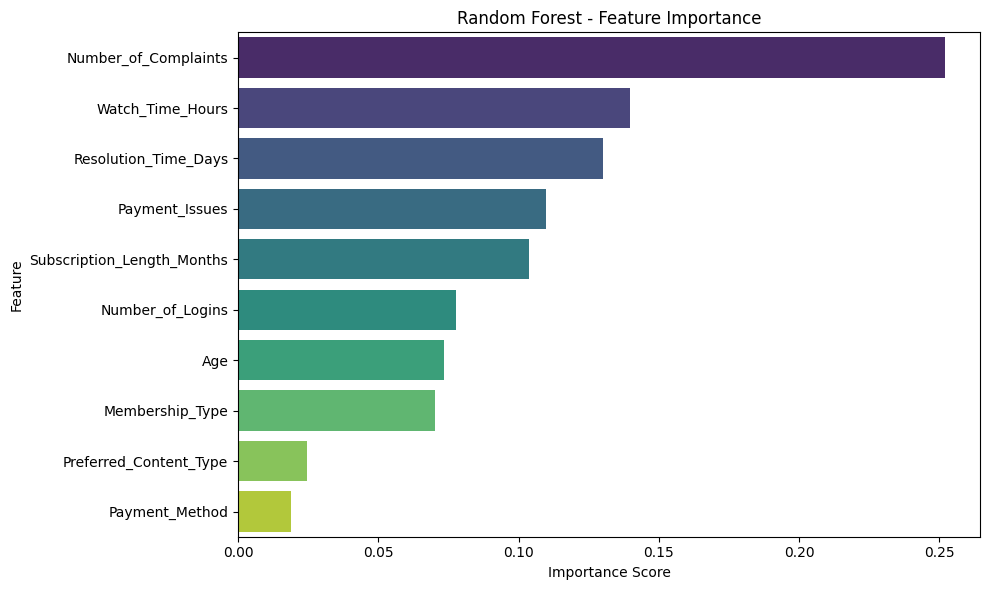

In [ ]:
# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, hue='Feature', legend=False, palette='viridis')
plt.title('Random Forest - Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
# The Random Forest feature importance analysis confirms that Number_of_Complaints (25.2%) is the strongest predictor of churn, 
# followed by Watch_Time_Hours (14.0%), Resolution_Time_Days (13.0%), and Payment_Issues (11.0%). 
# These  four features account for approximately 63% of the model's predictive power.
# this means that churn is mostly influenced by customer service issues and engagement.

## Task 4 – Business Insights and Recommendations

### Key Factors Driving Churn

**(Customer Service):**
- Number_of_Complaints -> strongest predictor at 25.2% importance
- Resolution_Time_Days -> longer wait times increase churn (13% importance)
- Payment_Issues -> customers with billing problems are more likely to leave (11% importance)
**Low Impact:**
- Age, Payment_Method, Preferred_Content_Type -> minimal influence on churn

### Three Actionable Business Recommendations

**1. Improve Complaint Resolution**
- Invest in customer support quality and reduce resolution times
- Number_of_Complaints and Resolution_Time_Days are the top churn drivers

**2. Fix Payment Issues Proactively**
- Implement automated billing alerts and offer multiple payment options
- Proactively contact customers with failed payments before they churn
- Payment_Issues has 11% importance and 0.24 correlation with churn

**3. Boost Customer Engagement**
- Offer personalized content recommendations and new content alerts
- Watch_Time_Hours is the only protective factor, more watching means less churn

### How the Model Supports These Recommendations

The Random Forest model identifies at-risk customers with **96% recall**, meaning the company can proactively target nearly all potential churners. By focusing retention efforts on customers flagged by the model particularly those with high complaints, unresolved payment issues, or declining watch time.

The feature importance rankings directly inform which business areas need the most investment:
- **Customer Support** -> complaints and resolution time
- **Billing Systems** -> payment issues
- **Content Engagement** -> watch time